In [375]:
import pandas as pd
import numpy as np

In [376]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
71,72,IPL-2008,Mumbai,27/04/2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN


In [378]:
total_score_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11776\4001017749.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [379]:
total_score_df['total_runs']=total_score_df['total_runs']+1
total_score_df

,match_id,inning,total_runs
0,1,1,208
1,1,2,173
2,2,1,185
3,2,2,188
4,3,1,184
...,...,...,...
1523,11413,2,171
1524,11414,1,156
1525,11414,2,163
1526,11415,1,153


In [380]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [381]:
match_df=matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


In [382]:
match_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [383]:
team=['Sunrisers Hyderabad', 'Mumbai Indians', 
        'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals']

In [384]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [385]:
match_df=match_df[match_df['team1'].isin(team)]
match_df=match_df[match_df['team2'].isin(team)]

In [386]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09/04/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10/04/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12/04/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05/05/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07/05/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08/05/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10/05/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [387]:
match_df.dl_applied.value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [388]:
match_df=match_df[match_df.dl_applied==0]
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09/04/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10/04/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12/04/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


In [389]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [390]:
deliveries_df=match_df.merge(deliveries,on='match_id')

In [391]:
deliveries_df=deliveries_df[deliveries_df['inning']==2]
deliveries_df.shape

(72413, 24)

In [392]:
deliveries_df['total_runs_y'] = pd.to_numeric(deliveries_df['total_runs_y'], errors='coerce')

In [393]:
deliveries_df['current_score']=deliveries_df.groupby('match_id')['total_runs_y'].cumsum()


In [394]:
deliveries_df['runs_left']=deliveries_df['total_runs_x']-deliveries_df['current_score']
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


In [395]:
deliveries_df['balls_left']=126 - (deliveries_df['over'] * 6 + deliveries_df['ball'])
deliveries_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [396]:
deliveries_df['player_dismissed']=deliveries_df['player_dismissed'].fillna(0)
deliveries_df['player_dismissed']=deliveries_df['player_dismissed'].apply(lambda x:x if x==0 else 1)
deliveries_df['player_dismissed']=deliveries_df['player_dismissed'].astype('int')

In [397]:
wickets=deliveries_df.groupby('match_id').cumsum()['player_dismissed'].values


C:\Users\user\AppData\Local\Temp\ipykernel_11776\21137478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets=deliveries_df.groupby('match_id').cumsum()['player_dismissed'].values


In [398]:
deliveries_df['wickets_left']= 10- wickets
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [399]:
deliveries_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [400]:
# crr=current run rate = run/overs
deliveries_df['crr']=(deliveries_df['current_score'] * 6)/(120-deliveries_df['balls_left'])
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,205,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,201,115,10,8.4


In [401]:
#rrr = required run rate
deliveries_df['rrr']=(deliveries_df['runs_left'] * 6)/deliveries_df['balls_left']
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [402]:
def result(row):
    return 1 if row['winner']== row['batting_team'] else 0

In [403]:
deliveries_df['result']=deliveries_df.apply(result,axis=1)
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [404]:
final_df=deliveries_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [405]:
final_df=final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
26022,Royal Challengers Bangalore,Mumbai Indians,Johannesburg,34,32,9,150,7.909091,6.375,1


In [406]:
final_df['city']=final_df.city.fillna('0')

In [407]:
final_df = final_df[final_df['balls_left'] != 0]

In [408]:
final_df['rrr']

129405     8.023256
3953      10.642857
76790      6.000000
10763      6.666667
55188      8.035714
            ...    
4896       8.166667
103892     5.200000
127432     8.894737
84726     12.093750
33772     13.888889
Name: rrr, Length: 72172, dtype: float64

In [409]:
X=final_df.iloc[:,:-1]
Y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [410]:
X

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
129405,Sunrisers Hyderabad,Delhi Daredevils,Hyderabad,115,86,10,167,9.176471,8.023256
3953,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,149,84,7,208,9.833333,10.642857
76790,Chennai Super Kings,Kolkata Knight Riders,Kolkata,119,119,10,120,6.000000,6.000000
10763,Mumbai Indians,Kolkata Knight Riders,Kolkata,70,63,7,138,7.157895,6.666667
55188,Mumbai Indians,Kings XI Punjab,Chandigarh,150,112,10,164,10.500000,8.035714
...,...,...,...,...,...,...,...,...,...
4896,Delhi Daredevils,Sunrisers Hyderabad,Delhi,49,36,7,186,9.785714,8.166667
103892,Chennai Super Kings,Mumbai Indians,Mumbai,39,45,7,184,11.600000,5.200000
127432,Mumbai Indians,Chennai Super Kings,Pune,169,114,10,177,8.000000,8.894737
84726,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,129,64,7,191,6.642857,12.093750


In [411]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city'])])

In [412]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe=Pipeline(steps=[('step1',trf),('step2',LogisticRegression())])
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [413]:
pipe.fit(X_train,Y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression())])

In [414]:
Y_pred=pipe.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7967440249393835

In [415]:
result=pipe.predict_proba(X_test)[74]
result

array([0.26499262, 0.73500738])

In [416]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [417]:
deliveries_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [418]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'])
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    
temp_df,target = match_progression(deliveries_df,74,pipe)
temp_df

Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,65.0,35.0
10467,2,8,0,58.5,41.5
10473,3,1,0,64.9,35.1
10479,4,7,1,74.3,25.7
10485,5,12,0,65.0,35.0
10491,6,13,0,53.5,46.5
10497,7,9,0,47.7,52.3
10505,8,15,0,33.9,66.1
10511,9,7,0,31.6,68.4
10518,10,17,0,18.9,81.1


In [425]:
pipe.predict_proba(X_test)[74]

array([0.26499262, 0.73500738])

In [436]:
deliveries_df[deliveries_df['match_id']==74]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
10454,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,1,1,B Chipli,...,0,NaN,NaN,1,178,119,10,6.000000,8.974790,0
10455,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,1,2,W Jaffer,...,0,NaN,NaN,2,177,118,10,6.000000,9.000000,0
10456,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,1,3,W Jaffer,...,0,NaN,NaN,2,177,117,10,4.000000,9.076923,0
10457,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,1,4,W Jaffer,...,0,NaN,NaN,3,176,116,10,4.500000,9.103448,0
10458,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,1,5,B Chipli,...,0,NaN,NaN,3,176,115,10,3.600000,9.182609,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,19,6,B Akhil,...,1,run out,Joginder Sharma,162,17,6,1,8.526316,17.000000,0
10574,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,20,1,B Akhil,...,0,NaN,NaN,163,16,5,1,8.504348,19.200000,0
10575,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,20,2,DW Steyn,...,0,NaN,NaN,164,15,4,1,8.482759,22.500000,0
10576,74,Bangalore,Chennai Super Kings,179,2,Royal Challengers Bangalore,Chennai Super Kings,20,3,B Akhil,...,0,NaN,NaN,165,14,3,1,8.461538,28.000000,0


Text(0.5, 1.0, 'Target-179')

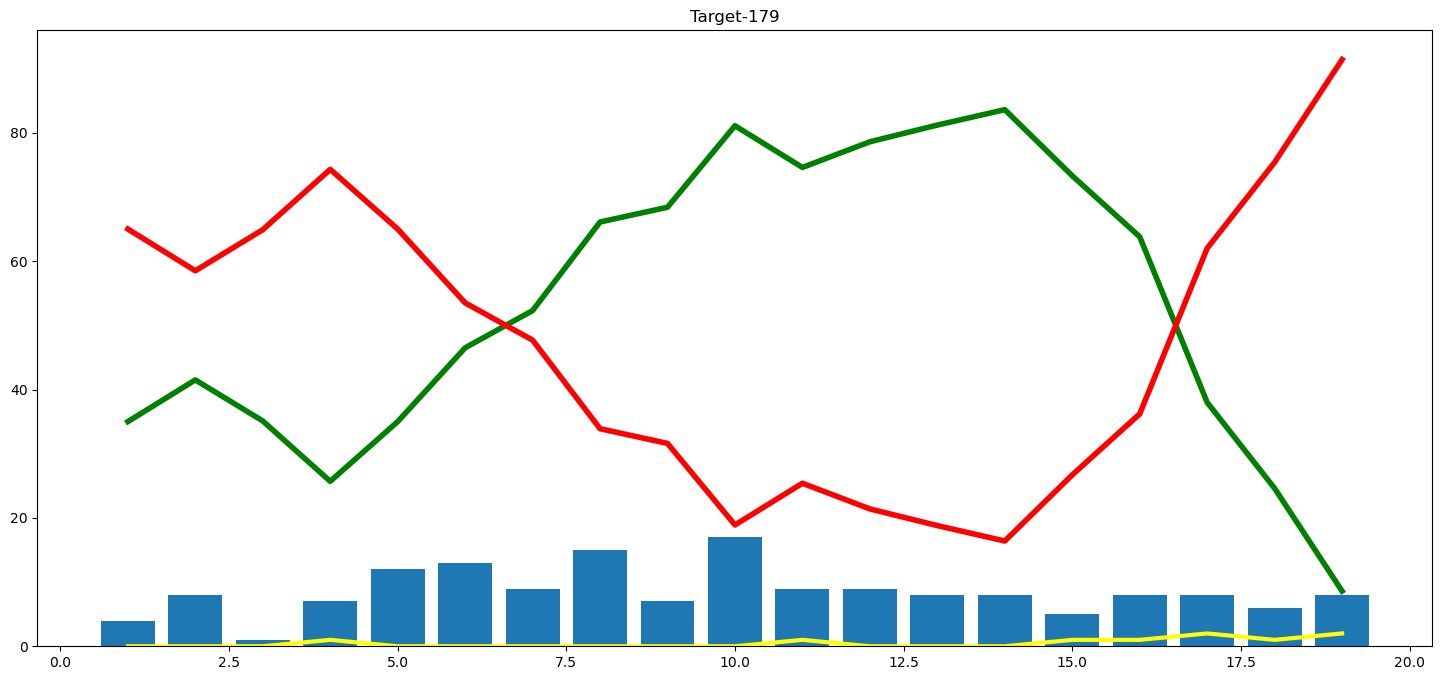

In [419]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [420]:
team

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [421]:
deliveries_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [423]:
import pickle 
pickle.dump(pipe,open('pipe.pkl','wb'))

In [437]:
pickle.dump(deliveries_df,open('deliveries_df.pkl','wb'))